<a href="https://colab.research.google.com/github/qadeerineurope/tccm-homeworks/blob/master/Notebook1/ML_in_a_nutshell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

Welcome to this **Machine Learning (ML)** tutorial, where we will explore fundamental concepts and algorithms that are widely used in data science. The tutorials are taken  **GeeksforGeeks** and **Python courses**.

## What You'll Learn in This Tutorial

In this tutorial, we will cover essential concepts and techniques in ML. Below are the key topics we will explore:

### 1. **Kernel Ridge Regression (KRR)**  
Kernel Ridge Regression is a combination of ridge regression and the kernel trick. It helps handle non-linear relationships in data by transforming it into a higher-dimensional space where linear regression can be applied.

### 2. **Decision Trees**  
Decision trees are one of the simplest yet powerful algorithms for classification and regression tasks.

### 3. **Random Forest**  
Random Forest is an ensemble learning method that builds multiple decision trees and combines their results to improve accuracy and avoid overfitting.

### 4. **K-Nearest Neighbors (K-NN)**  
K-NN is a simple yet intuitive algorithm used for classification and regression. By examining the "neighbors" (or closest points) of a data point, K-NN can predict its class or value.

### 5. **Principal Component Analysis (PCA)**  
PCA is a dimensionality reduction technique that simplifies data while retaining as much variability as possible. It is commonly used for visualizing high-dimensional data and speeding up other machine learning algorithms by reducing the number of features.

### 6. **Neural Networks (Single Perceptron)**  
Neural networks, particularly a single-layer perceptron, are the building blocks for more advanced deep learning models. We will dive into how a perceptron works, how it makes predictions, and its limitations when dealing with more complex data.

### 7. **Evaluation Metrics for Classification**  
To assess the performance of classification algorithms, we need to measure how well our model is doing. In this section, we will cover basic evaluation metrics such as **accuracy**, **precision**, **recall**, **F1 score**, and **confusion matrix**. These metrics help us understand the strengths and weaknesses of a model.

## About This Tutorial

This tutorial has been  designed to guide you through simple example in ML using **Python** and  **scikit-learn**. You’ll get hands-on  with each algorithm and see how they are implemented.



In [1]:
!pip install scikit-learn matplotlib numpy pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# **Kernel Ridge Regression**

Tutorial from [GeeksforGeeks](https://www.geeksforgeeks.org/understanding-kernel-ridge-regression-with-sklearn/).

Kernel ridge regression (KRR) is a powerful technique for tackling regression problems, particularly when dealing with non-linear relationships between features and the target variable.  This technique allows for the modeling of complex, nonlinear relationships between variables, making it a valuable asset in data analysis.

Kernel ridge regression is a variant of ridge regression that uses the **kernel trick** to learn a linear function in a high-dimensional feature space. This allows KRR to handle nonlinear data without the need for explicit transformation into a higher-dimensional space. This is achieved by using a kernel function, which computes the dot product between two vectors in the high-dimensional space based on their original feature space representations.

1. **Kernel Functions:** Kernel functions are the core of KRR. They define the similarity between data points in the high-dimensional feature space. Common kernel functions include the radial basis function (RBF), polynomial kernel, and sigmoid kernel. Each kernel function has its own strengths and weaknesses, and the choice of kernel depends on the specific problem and data characteristics.
2. **Regularization:** Regularization is a crucial aspect of KRR. It helps prevent overfitting by adding a penalty term to the loss function. The regularization strength is controlled by the alpha parameter, which determines the magnitude of the penalty.
3. **Dual Coefficients:** In KRR, the weights are not computed directly. Instead, the dual coefficients are calculated, which are the weights in the high-dimensional feature space. These coefficients are used to make predictions.

Mean Squared Error: 122.25324662021842


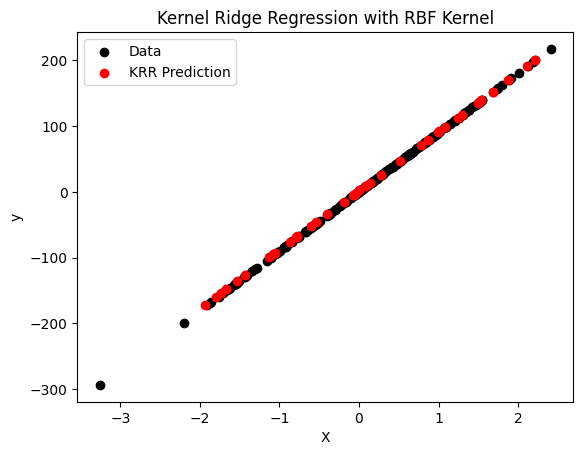

In [3]:
X, y = make_regression(n_samples=200, n_features=1, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

krr = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.1)
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X, y, color='black', label='Data')
plt.scatter(X_test, y_test, color='red', label='KRR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Kernel Ridge Regression with RBF Kernel')
plt.show()

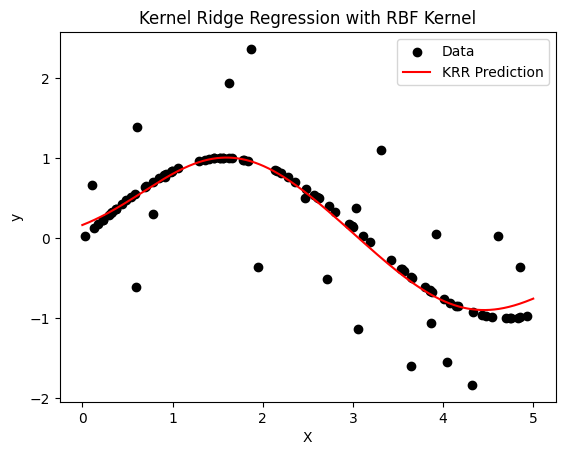

In [4]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)
X = 5 * rng.rand(100, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.5)
model.fit(X, y)
X_plot = np.linspace(0, 5, 1000)[:, None]
y_plot = model.predict(X_plot)

plt.scatter(X, y, color='black', label='Data')
plt.plot(X_plot, y_plot, color='red', label='KRR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Kernel Ridge Regression with RBF Kernel')
plt.show()

# **Decision Tree**

Tutorial from [Lecture 31 of Python Course](https://python-course.eu/machine-learning/decision-trees-in-python.php).  

We will concentrate on classification in this decision tree. Decision trees are assigned to the information based learning algorithms which use different measures of information gain for learning. We can use decision trees for issues where we have continuous but also categorical input and target features.

The main idea of decision trees is to find those descriptive features which contain the most "information" regarding the target feature and then split the dataset along the values of these features such that the target feature values for the resulting sub_datasets are as pure as possible. The descriptive feature which leaves the target feature most purely is said to be the most informative one. This process of finding the "most informative" feature is done until we accomplish a stopping criteria where we then finally end up in so called **leaf nodes**.

The leaf nodes contain the predictions we will make for new query instances presented to our trained model. This is possible since the model has kind of learned the underlying structure of the training data and hence can, given some assumptions, make predictions about the target feature value (class) of unseen query instances.

We use as a practical example a simplified version of the UCI machine learning Zoo Animal Classification dataset which includes properties of animals as descriptive features and the and the animal species as target feature. This dataset consists of 101 rows and 17 categorically valued attributes defining whether an animal has a specific property or not (e.g.hairs, feathers,..). The first attribute represents the name of the animal and will be removed. The target feature consist of 7 integer values [1 to 7] which represents [1:Mammal, 2:Bird, 3:Reptile, 4:Fish, 5:Amphibian, 6:Bug, 7:Invertebrate]

<p align="center">
  <img src="https://python-course.eu/images/machine-learning/Information_Gain_Calculation_600w.webp" width="600" />
</p>

The steps to use the sklearn classification decision tree follow the principal sklearn API which are:

    1. Choose the model you want to use --> the DecisionTreeClassifier
    2. Set the model hyperparameters --> E.g. number of minimum samples per leaf
    3. Create a feature data set as well as a target array containing the labels for the instances
    4. Fit the model to the training data
    5. Use the fitted model on unseen data.


In [ ]:
! rm *.data
!wget https://raw.githubusercontent.com/marcpezz/ML_presentation/refs/heads/main/Notebook1/zoo.data
!wget https://raw.githubusercontent.com/marcpezz/ML_presentation/refs/heads/main/Notebook1/agaricus-lepiota.data
!wget https://raw.githubusercontent.com/marcpezz/ML_presentation/refs/heads/main/Notebook1/wine.data

In [6]:
#Import the DecisionTreeClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#Import the dataset
dataset = pd.read_csv('zoo.data')
#We drop the animal names since this is not a good feature to split the data on
dataset=dataset.drop('animal_name',axis=1)

train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]

tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)

prediction = tree.predict(test_features)


print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")

FileNotFoundError: [Errno 2] No such file or directory: 'zoo.data'

# **Random Forest**

Tutorial from [Lecture 33 of Python Course](https://python-course.eu/machine-learning/random-forests-in-python.php)

Tree models are known to be high variance, low bias models. In consequence, they are prone to overfit the training data. Another drawback of classical tree models is that they are relatively unstable. This instability can lead to the situation that a small change in the composition of the dataset leads to a completely different tree model.

For instance, consider the case where a categorically scaled feature *A* is used as the "root node feature". Following, this feature is replaced from the dataset an no longer existent in the sub trees. Now imagine the situation where we replace a single row in the dataset and this change leads to the situation that now feature *B* has the largest information gain or reduction in variance respectively. What does that mean? Well, feature *B* is now preferred over feature *A* as "root node feature" which leads to a completely different tree just because we have altered one single instance in the dataset. This situation may not only occur at the root node but also at all interior nodes of the tree.

The Random Forest approach is based on two concepts, called **bagging** and **subspace sampling**. **Bagging** is the short form for *bootstrap aggregation*. Here we create a multitude of datasets of the same length as the original dataset drawn from the original dataset with replacement (the *bootstrap* in bagging). We then train a tree model for each of the bootstrapped datasets and take the majority prediction of these models for a unseen query instance as our prediction (the *aggregation* in bagging). Here we take the mean or the median for regression tree models and the mode for classification tree models. Bagging advanced us towards our goal of having a more powerful model creating more accurate results.

Unfortunately it turns out that the bagged models are correlated and hence often relatively equal. That is, based on the correlation they produce similar results. This can be reduced to the fact that the bagging is using the whole feature set (all the descriptive features) for each model. Now assume that there are one or two very strong features which surmounts all the others  in terms of "predictiveness". Even if we change the composition of the data by sampling with replacement, these two are likely to remain the dominant features and hence will serve as the root node or the first hidden node layer respectively. In consequence, the trees look all quite similar. It can done excluding these two feature and hence performing the **subspace sampling**.


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

# Load the Zoo dataset (assuming the file is named 'zoo.data')
dataset = pd.read_csv('zoo.data', header=None)

# Shuffle the dataset
dataset = dataset.sample(frac=1)

# Assign column names based on the dataset's description
dataset.columns = [
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
    'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
    'legs', 'tail', 'domestic', 'catsize', 'type'
]

# Drop the animal name column as it is not a feature for classification
dataset = dataset.drop(['animal_name'], axis=1)

# Encode the target and feature values
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit_transform(dataset[label])

# Define features and target variable
X = dataset.drop(['type'], axis=1)
Y = dataset['type']


import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

# Train and evaluate the model with different numbers of estimators
for i in range(1, 100, 5):
    Random_Forest_model = RandomForestClassifier(n_estimators=i, criterion="entropy")
    accuracy = cross_validate(Random_Forest_model, X, Y, cv=10)['test_score']
    print('The accuracy is: ', sum(accuracy) / len(accuracy) * 100, '%')


FileNotFoundError: [Errno 2] No such file or directory: 'zoo.data'

The same, but with the mushroom database from UCI.

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

dataset = pd.read_csv('agaricus-lepiota.data',header=None)
dataset = dataset.sample(frac=1)
dataset.columns = ['target','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
             'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
             'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
             'habitat']

#Encode the feature values which are strings to integers
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])

X = dataset.drop(['target'],axis=1)
Y = dataset['target']

for i in range(1,5,1):
    Random_Forest_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    accuracy = cross_validate(Random_Forest_model,X,Y,cv=10)['test_score']
    print('The accuracy is: ',sum(accuracy)/len(accuracy)*100,'%')


# **k-Nearest Neighbours**

Tutorial from [Lecture 8 of Python Course](https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-in-python.php)

We will use the "iris" dataset provided by the datasets of the sklearn module to test the nearest neighobour classifier. The data set consists of 50 samples from each of three species of Iris

    Iris setosa,
    Iris virginica and
    Iris versicolor.

Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.
We calculate the distances between the point of the sample and the object to be classified using the Euclidian distance between two instances.

$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i -y_i)^2}$$

The next step will be to get the **neighbours** list between elements in the dataset. Classification can be computed by a majority **vote** of the nearest neighbors of the unknown sample. Objectss can be classfied by majority vote (not trustable for more distant points). We can solve this problem assign weights to the neighbours (for example using the harmonic series as weights):

$$\sum_{i}^{k}{1/(i+1)} = 1 + \frac{1}{2} + \frac{1}{3} + ... + \frac{1}{k}$$

More complex approaches can be used, for example including the real distance as a metric.



In [ ]:
#Functions used in the set
def distance(instance1, instance2):
    """ Calculates the Eucledian distance between two instances"""
    return np.linalg.norm(np.subtract(instance1, instance2))

def get_neighbors(training_set,
                  labels,
                  test_instance,
                  k,
                  distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The function returns a list of k 3-tuples.
    Each 3-tuples consists of (index, dist, label)
    where
    index    is the index from the training_set,
    dist     is the distance between the test_instance and the
             instance training_set[index]
    distance is a reference to a function used to calculate the
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

from collections import Counter

def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)




In [ ]:
#Load the dataset and print some info about it.
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
labels = iris.target

for i in [0, 79, 99, 121]:
    print(f"index: {i:3}, features: {data[i]}, label: {labels[i]}")

In [8]:
# Splitting the dataset between training and testing
# seeding is only necessary for the website so that the values are always equal:
np.random.seed(42)
indices = np.random.permutation(len(data))

n_test_samples = 12     # number of test samples
learn_data = data[indices[:-n_test_samples]]
learn_labels = labels[indices[:-n_test_samples]]
test_data = data[indices[-n_test_samples:]]
test_labels = labels[indices[-n_test_samples:]]

print("The first samples of our learn set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d}   {learn_data[i]}   {learn_labels[i]:3}")

print("The first samples of our test set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d}   {learn_data[i]}   {learn_labels[i]:3}")

NameError: name 'data' is not defined

In [9]:
#Plot the original data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learn_data)):
        if learn_labels[i] == iclass:
            X[iclass][0].append(learn_data[i][0])
            X[iclass][1].append(learn_data[i][1])
            X[iclass][2].append(sum(learn_data[i][2:]))

colours = ("r", "g", "y")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
       ax.scatter(X[iclass][0],
                  X[iclass][1],
                  X[iclass][2],
                  c=colours[iclass])
plt.show()

NameError: name 'learn_data' is not defined

In [ ]:
# Print the distances
print(distance([3, 5], [1, 1]))
print(distance(learn_data[3], learn_data[44]))

#
for i in range(n_test_samples):
    neighbors = get_neighbors(learn_data,
                              learn_labels,
                              test_data[i],
                              5,
                              distance=distance)
    print("index: ", i,
          ", vote_prob: ", vote_prob(neighbors),
          ", label: ", test_labels[i],
          ", data: ", test_data[i])

In [ ]:
for i in range(n_test_samples):
    neighbors = get_neighbors(learn_data,learn_labels,test_data[i],6,distance=distance)
    print("index: ", i,", result of vote: ",vote_harmonic_weights(neighbors,all_results=True))


# **Principal Component Analysis**

Tutorial from [Lecture 35 of Python Course](https://python-course.eu/machine-learning/principal-component-analysis-pca-in-python.php).

The principal components of a dataset are the "directions" in a dataset which hold the most variation. We want to have this direction (the direction with the largest variance) because in the future we want to use the principal components of the dataset to reduce dimensionality of our dataset the either make it "plottable" by reducing it to three or less dimensions, or simply to reduce the size of the dataset without loosing too much of the information.

$$var(x)= \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n}$$

We will test the model using the UCI wine dataset.



In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd

# Data collection
df = pd.read_table('wine.data', sep=',', names=['Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols',
                                                'Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue',
                                                'OD280/OD315_of_diluted_wines','Proline'])

print("Original Feature Data (First 5 rows):")
print(df.head())

# Extracting target labels (assuming the first column in the data file is the target)
target1 = df.iloc[:, 0].values  # The first column is assumed to be the class label (target)

# Feature data (excluding the target column)
features = df.iloc[:, 1:].values

# Data normalization (standardizing the features)
df1 = StandardScaler().fit_transform(features)

# PCA (Reducing to 2 dimensions)
PCA_model = PCA(n_components=2, random_state=42)  # Reducing to two components for visualization
data_transformed = PCA_model.fit_transform(df1)  # Only features should be passed into PCA

# Plot the data
fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)

# Scatter plot for all data points
scatter = ax0.scatter(data_transformed[:, 0], data_transformed[:, 1], c=target1, cmap='viridis')

# Create a legend (using unique values of the target)
# We assume target1 is a categorical variable that represents different classes
for l, c in zip(np.unique(target1), ['red', 'green', 'blue']):
    ax0.scatter(data_transformed[target1 == l, 0], data_transformed[target1 == l, 1], c=c, label=f'Class {l}')

ax0.legend()
plt.show()


### **Meaning of the plot:**  
**X-axis:** Represents the projection of the original data points on the first principal component (PC1).  
**Y-axis:** Represents the projection of the original data points on the second principal component (PC2).  
**Colors of Points:** Represent the different classes or categories that the samples belong to (e.g., different types of wine in the dataset).

In [ ]:
print("Explained variance ratio for each principal component:")
print(PCA_model.explained_variance_ratio_)

print("\nCumulative explained variance:")
print(np.cumsum(PCA_model.explained_variance_ratio_))

print("\nPrincipal components (Eigenvectors):")
print(PCA_model.components_)

# Optionally, print the transformed data (first 5 rows)
print("\nTransformed data (first 5 rows):")
print(data_transformed[:5, :])


# **A Simple Neural Network from Scratch in Python**

Tutorial from [Lecture 12 of Python Courses](https://python-course.eu/machine-learning/simple-neural-network-from-scratch-in-python.php).

We will use a neural network with only one perceptron to separate two classes. These classes are *linearly separable*. Two sets of points (or classes) are called linearly separable, if at least one straight line in the plane exists so that all the points of one class are on one side of the line and all the points of the other class are on the other side.

$$ \sum_{i=1}^n x_i \cdot w_i = 0 $$

Otherwise, i.e. if such a decision boundary does not exist, the two classes are called linearly inseparable. In this case, we cannot use a simple neural network.

A perceptron with two input values and a bias corresponds to a general straight line. With the aid of the bias value b we can train the perceptron to determine a decision boundary with a non zero intercept *c*.

$$ \sum_{i=1}^n x_i \cdot w_i  + w_{n+1}\cdot b= 0 $$



In [10]:
%%capture
%%writefile perceptrons.py

import numpy as np
from collections import Counter

class Perceptron:

    def __init__(self,
                 weights,
                 bias=1,
                 learning_rate=0.3):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        if  x <= 0:
            return 0
        else:
            return 1

    def __call__(self, in_data):
        """
                Perform forward pass through the perceptron.
        """
        in_data = np.concatenate( (in_data, [self.bias]) )
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)

    def adjust(self,
               target_result,
               in_data):
        """
        Adjust weights based on error.

        Args:
            target_result: Target output.
            in_data: Input data.
        """

        in_data = np.array(in_data)
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        """
        Evaluate the perceptron on a dataset.

        Args:
            data: List of input data arrays.
            labels: List of corresponding labels (0 or 1).

        Returns:
            Counter object containing evaluation results.
        """
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In our case, we will create an example with linearly separable data sets in 2 dimensions.
<p align="center">
  <img src="https://python-course.eu/images/machine-learning/perceptron_two_inputs_and_bias_400w.webp" width="300" />
</p>

$$w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot b= 0$$
$$x_2 = -\frac{w_1}{w_2} \cdot x_1 - \frac{w_3}{w_2} \cdot b$$
$$m = -\frac{w_1}{w_2}$$
$$c = - \frac{w_3}{w_2} \cdot b$$

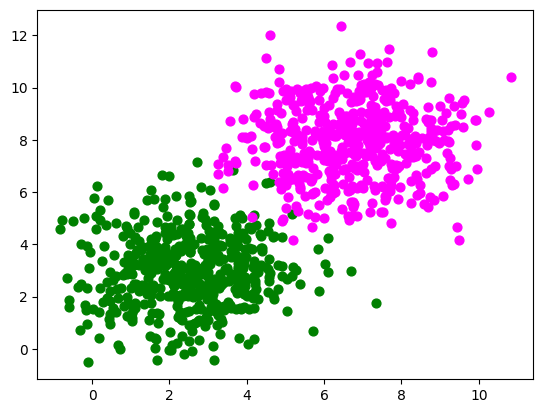

In [11]:
# Create two 2D clusters and plot them
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1000
samples, labels = make_blobs(n_samples=n_samples,
                             centers=([2.5, 3], [6.7, 7.9]),
                             cluster_std=1.4,random_state=210)

colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))


In [12]:
#Split the dataset beteen train and test
from sklearn.model_selection import train_test_split
res = train_test_split(samples, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)

train_data, test_data, train_labels, test_labels = res

In [13]:
#Use of the in house perceptron to train the model
from perceptrons import Perceptron

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.8)

for sample, label in zip(train_data, train_labels):
    p.adjust(label,sample)

evaluation = p.evaluate(train_data, train_labels)
print("Train evaluation:",evaluation)
evaluation = p.evaluate(test_data, test_labels)
print("Test evaluation:",evaluation)


Train evaluation: Counter({'correct': 785, 'wrong': 15})
Test evaluation: Counter({'correct': 198, 'wrong': 2})


m= -0.7329384704876067 c= 9.40538437008698


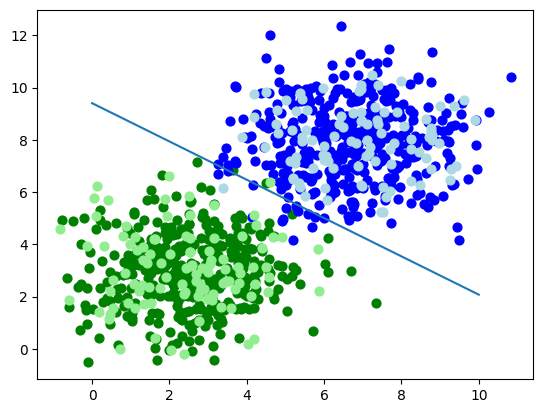

In [14]:
# Plot the final results
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(train_data[train_labels==n_class][:, 0],
               train_data[train_labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))

# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],
               test_data[test_labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))



X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print("m=",m,"c=",c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()

# **Evaluation Metrics**

Tutorial from [Lecture 3 of Python Course](https://python-course.eu/machine-learning/evaluation-metrics.php).

**Accuracy** is a statistical measure which is defined as the quotient of correct predictions (both True positives (TP) and True negatives (TN)) made by a classifier divided by the sum of all predictions made by the classifier, including False positves (FP) and False negatives (FN). Therefore, the formula for quantifying binary accuracy is:

$$\text{accuracy} = {{TP + TN} \over {TP + TN + FP + FN}}$$

**Precision** is the ratio of the correctly identified positive cases to all the predicted positive cases, i.e. the correctly and the incorrectly cases predicted as positive. Precision is the fraction of retrieved documents that are relevant to the query. The formula:

$$precision = {TP \over {TP + FP}}$$

**Recall**, also known as sensitivity, is the ratio of the correctly identified positive cases to all the actual positive cases, which is the sum of the "False Negatives" and "True Positives".

$$recall = {TP \over {TP + FN}}$$

**F$_1$ score:**
$$F_1 = {2 \over {{1 \over recall} + {1 \over precision}}} = 2 \cdot {{{precision}\cdot{recall}} \over {{precision} + {recall}} }$$

A **confusion matrix**, also called a contingency table or error matrix, is used to visualize the performance of a classifier. The columns of the matrix represent the instances of the predicted classes and the rows represent the instances of the actual class. In the case of binary classification the table has 2 rows and 2 columns.

In [ ]:
TP, TN, FP, FN = 4, 91, 1, 4

accuracy = (TP + TN)/(TP + TN + FP + FN)
print("accuracy",accuracy)

precision = TP / (TP + FP)
print(f"precision: {precision:4.2f}")

recall = TP / (TP + FN)
print(f"recall: {recall:4.2f}")

f1_score = 2 * precision * recall / (precision + recall)
print(f"f1_score{f1_score:6.2f}")